In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt'
#url2 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190914.txt'
mta = pd.read_csv(url)

In [ ]:
# Urls with selected MTA data
urls = [
    '',
    '',
    '',
    ''
]

In [ ]:
# Read csv files in a dataframe
df_list = []
for url in urls:
    df_list.append(pd.read_csv(url))

mta = pd.concat(df_list)

## Initial data quality assessment

In [3]:
mta.shape

(204928, 11)

In [4]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483


In [5]:
# Check data for missing or null values
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204928 entries, 0 to 204927
Data columns (total 11 columns):
C/A                                                                     204928 non-null object
UNIT                                                                    204928 non-null object
SCP                                                                     204928 non-null object
STATION                                                                 204928 non-null object
LINENAME                                                                204928 non-null object
DIVISION                                                                204928 non-null object
DATE                                                                    204928 non-null object
TIME                                                                    204928 non-null object
DESC                                                                    204928 non-null object
ENTRIES                           

In [6]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
# Rename columns
mta.rename(columns={
    'C/A':'c_a',
    'UNIT':'unit',
    'SCP':'scp',
    'STATION':'station',
    'LINENAME':'linename',
    'DIVISION':'devision',
    'DATE':'date',
    'TIME':'time',
    'DESC':'desc',
    'ENTRIES':'entries',
    'EXITS                                                               ':'exits'
    }, inplace=True)

In [8]:
mta.entries.mean(), mta.entries.min(), mta.entries.max()

(42105051.90047236, 0, 2129093303)

In [9]:
mta.exits.mean(), mta.exits.min(), mta.exits.max()

(34874226.86503553, 0, 2123772306)

## Data massaging

In [10]:
#Make a column with a unique ID for each turnstile
mta['turnstile_id'] = mta['c_a'] + ', ' + mta['unit'] + ', '+ mta['scp'] + ', ' + mta['station']
mta.head(10)

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323,"A002, R051, 02-00-00, 59 ST"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325,"A002, R051, 02-00-00, 59 ST"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354,"A002, R051, 02-00-00, 59 ST"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428,"A002, R051, 02-00-00, 59 ST"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483,"A002, R051, 02-00-00, 59 ST"
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,20:00:00,REGULAR,7199405,2438527,"A002, R051, 02-00-00, 59 ST"
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2019,00:00:00,REGULAR,7199547,2438545,"A002, R051, 02-00-00, 59 ST"
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2019,04:00:00,REGULAR,7199567,2438547,"A002, R051, 02-00-00, 59 ST"
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2019,08:00:00,REGULAR,7199579,2438564,"A002, R051, 02-00-00, 59 ST"
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2019,12:00:00,REGULAR,7199648,2438630,"A002, R051, 02-00-00, 59 ST"


In [11]:
mta.turnstile_id.value_counts()

N336, R158, 00-00-00, KEW GARDENS         52
N336, R158, 00-05-00, KEW GARDENS         52
N336, R158, 00-03-01, KEW GARDENS         52
N336, R158, 00-00-04, KEW GARDENS         52
N336, R158, 00-00-02, KEW GARDENS         52
                                          ..
R504, R276, 00-00-01, VERNON-JACKSON      14
PTH16, R550, 01-02-03, LACKAWANNA         14
PTH17, R541, 01-00-02, THIRTY THIRD ST    10
PTH06, R546, 00-00-00, PAVONIA/NEWPORT     8
A007, R079, 01-06-01, 5 AV/59 ST           4
Name: turnstile_id, Length: 4889, dtype: int64

Different number of counts per turnstile. Might need more digging.

In [12]:
# Add datetime and date variables
mta['Datetime'] = pd.to_datetime(mta['date'] + ' ' + mta['time'])
mta['Date'] = pd.to_datetime(mta['date'])
mta.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id,Datetime,Date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323,"A002, R051, 02-00-00, 59 ST",2019-09-14 00:00:00,2019-09-14
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325,"A002, R051, 02-00-00, 59 ST",2019-09-14 04:00:00,2019-09-14
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354,"A002, R051, 02-00-00, 59 ST",2019-09-14 08:00:00,2019-09-14
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428,"A002, R051, 02-00-00, 59 ST",2019-09-14 12:00:00,2019-09-14
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483,"A002, R051, 02-00-00, 59 ST",2019-09-14 16:00:00,2019-09-14


In [13]:
mta.shape

(204928, 14)

In [37]:
# Get minimum reading for each turnstile per day
mta_min = mta.groupby(['turnstile_id', 'Date'])['entries', 'station'].min().reset_index() #making df with both indexes
mta_min.sample(10)

,turnstile_id,Date,entries,station
1771,"A058, R001, 01-00-03, WHITEHALL S-FRY",2019-09-20,135331032,WHITEHALL S-FRY
9196,"N073, R013, 02-00-04, 34 ST-PENN STA",2019-09-18,1879471,34 ST-PENN STA
30686,"R512, R092, 00-00-02, BROADWAY",2019-09-19,1439607,BROADWAY
22518,"R130, R321, 01-00-00, 18 ST",2019-09-20,151474,18 ST
16892,"N521, R300, 01-06-00, 2 AV",2019-09-15,2193934,2 AV
20282,"PTH13, R541, 00-04-07, THIRTY ST",2019-09-16,1,THIRTY ST
15327,"N408A, R256, 00-03-01, NASSAU AV",2019-09-18,64319,NASSAU AV
4395,"D010, R394, 00-00-03, BAY PKWY",2019-09-19,574731,BAY PKWY
12536,"N220, R155, 01-00-04, KINGSBRIDGE RD",2019-09-19,352398661,KINGSBRIDGE RD
22363,"R125, R189, 00-00-02, CHRISTOPHER ST",2019-09-19,16597343,CHRISTOPHER ST


In [15]:
mta_min.shape

(34174, 3)

In [16]:
# Calculating entries per day by subtracting min entries for given day from the next day. 
# Last day values are not calculated due to "the lack of the next day".
mta_daily = mta_min
mta_daily['entries_daily'] = mta_min.groupby(['turnstile_id'])['entries'].diff()

In [17]:
mta_daily.head()

,turnstile_id,Date,entries,entries_daily
0,"A002, R051, 02-00-00, 59 ST",2019-09-14,7198818,NaN
1,"A002, R051, 02-00-00, 59 ST",2019-09-15,7199547,729.0
2,"A002, R051, 02-00-00, 59 ST",2019-09-16,7200082,535.0
3,"A002, R051, 02-00-00, 59 ST",2019-09-17,7201361,1279.0
4,"A002, R051, 02-00-00, 59 ST",2019-09-18,7202723,1362.0


In [18]:
mta_daily.shape

(34174, 4)

In [19]:
# Fixing the `entries_daily`. Shifting up one row
mta_daily['entries_daily'] = mta_daily['entries_daily'].shift(-1)

In [20]:
mta_daily.head()
mta_daily.shape

(34174, 4)

In [21]:
mta_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34174 entries, 0 to 34173
Data columns (total 4 columns):
turnstile_id     34174 non-null object
Date             34174 non-null datetime64[ns]
entries          34174 non-null int64
entries_daily    29285 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.0+ MB


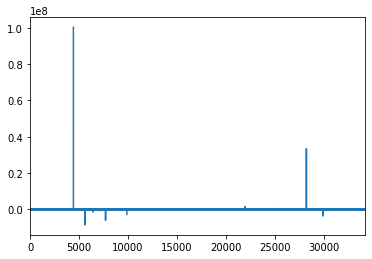

In [22]:
 mta_daily.entries_daily.plot()

In [23]:
# MTA daily number of passenger per station per day can't be more than ~500,000. 
# Note, we are looking at individual turnstiles, not stations yet.
mta_daily.entries_daily.max()

100259186.0

In [24]:
mta_daily.loc[mta_daily['entries_daily']>=500000]

,turnstile_id,Date,entries,entries_daily
4423,"D011, R394, 01-06-01, BAY PKWY",2019-09-19,775219651,100259186.0
21940,"R113, R028, 01-06-00, FULTON ST",2019-09-16,3900,1503450.0
24895,"R200A, R041, 01-05-01, BOWLING GREEN",2019-09-17,14,524274.0
28204,"R289, R119, 00-03-01, FORDHAM RD",2019-09-18,187873,33413588.0


In [28]:
mta_daily.loc[mta_daily['entries_daily']<0] # Count should not go down next day and so on - inconsistency - remove.

,turnstile_id,Date,entries,entries_daily
267,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-14,885813143,-401.0
268,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-15,885812742,-296.0
269,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-16,885812446,-217.0
270,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-17,885812229,-299.0
271,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-18,885811930,-317.0
...,...,...,...,...
33868,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-16,1559932613,-615.0
33869,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-17,1559931998,-622.0
33870,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-18,1559931376,-626.0
33871,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-19,1559930750,-543.0


In [32]:
# Remove the daily enatries that do not make sence (> 500,000)
mta_daily.loc[mta_daily['entries_daily'] >= 500000,'entries_daily'] = np.nan
mta_daily.loc[mta_daily['entries_daily'] < 0,'entries_daily'] = np.nan

In [33]:
mta_daily.shape

(34174, 4)

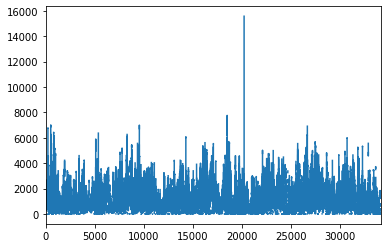

In [34]:
mta_daily.entries_daily.plot()

In [38]:
mta_daily.shape

(34174, 4)

In [ ]:
# Daily entries by stations
station_daily = mta_daily.groupby(['station', 'Date'])['entries_daily'].sum().reset_index()

In [ ]:
station_daily

In [40]:
# Sum of entries by stations for a week (6 days due to solutuon limitation)
station_weekly = mta_daily.groupby(['station'])['entries_daily'].sum().reset_index()

KeyError: 'station'

In [ ]:
station_weekly

# Graphs

In [39]:
plt.plot(station_weekly['station'], station_weekly['entries_daily'])

NameError: name 'station_weekly' is not defined